# Introduction
* In this project i'll be analyzing data associated with movies.
* First, I'll present the questions that I will answer
* Secondly,I'll wrangling the data
* Third, explore the data with coclusions

# The questions:-

- Do movies with high vote_count have high revenues?
- In what year that have a higher revenues?
- How long is the average of movie time?
- Do movies with high budget have high revenues?

# Summary of wrangling 
- Drop some attributes {'imdb_id' , 'cast', 'homepage','director','tagline', 'keywords','overview'
   ,'production_companies', 'revenue','budget'}
-  Dealing with missing values in genres attribute by making the missing value is None 
- Drop the duplicates in data 
- Change type of attribute (release_date) from object to date_time


## Data Wrangling

In [6]:
# import the library 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# read data by pandas 
movies = pd.read_csv('tmdb-movies.csv')
movies.head()

In [4]:
# make in formation about movies 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Drop irrelevent attributes 
movies.drop(['imdb_id' , 'cast', 'homepage','director','tagline', 'keywords','overview'
   ,'production_companies', 'revenue','budget'],axis = 1 , inplace = True)

In [5]:
# show if we have null value in data 
movies.isnull().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [6]:
# fill missing with None
movies['genres'].fillna('None' , axis = 0 , inplace = True)


In [7]:
# Change the type of release_date
movies['release_date'] = pd.to_datetime(movies['release_date'])
print(movies.duplicated().sum())

1


In [8]:
# drop the duplicated
movies.drop_duplicates(inplace = True)
# check of modifications 
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 1018.6+ KB


## Exploring 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb5f73fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb5d6b7b8>]], dtype=object)

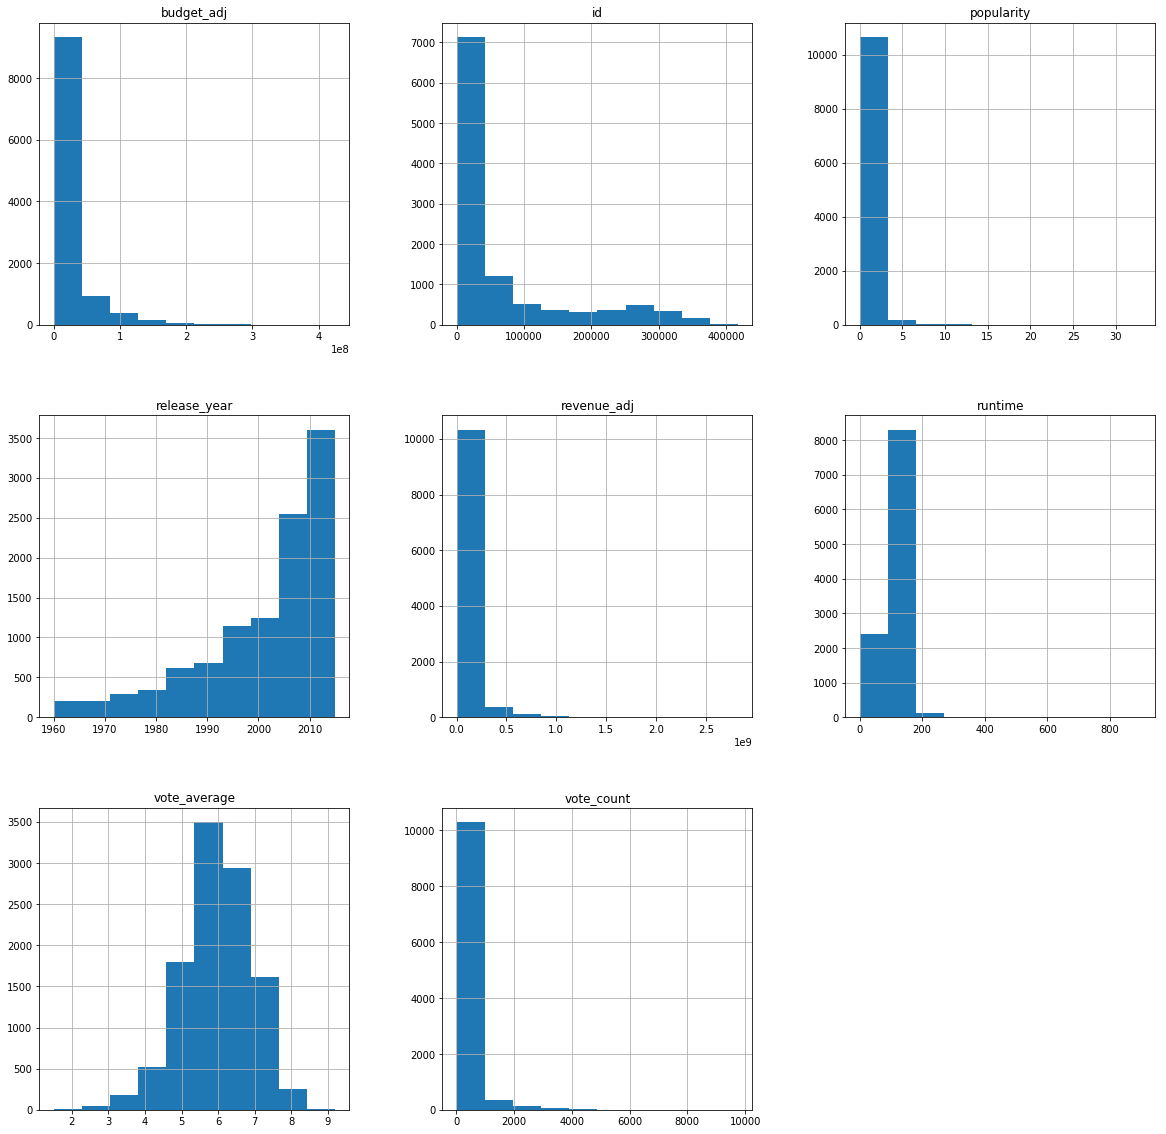

In [9]:
# plot all attributes  with histogram 
movies.hist(figsize = (20,20))

## Conclusions

- popularity : there are more than 10000 movies are popularity
- releas_year appear skewed to the left 
- vote_average  appear to be normally distributed
- There are more than 10000 movies that have received high revenues and there are some movies that have low revenues
- There are more than 10000 movies that have received high budget and there are some movies that have low budget
- Most of movies have runtime 1h to 1:80:0
    

## Research Question 1 (Do movies with high vote_count have high revenues?)

Text(0,0.5,'revenue')

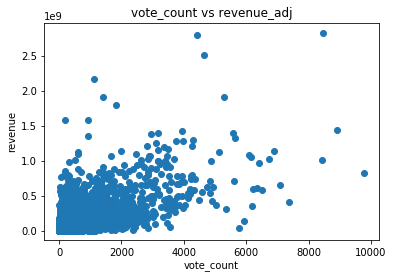

In [10]:
#plot the relationship between vote_count and revenue_adj
plt.scatter(x=movies.vote_count, y=movies.revenue_adj)
plt.title('vote_count vs revenue_adj')
plt.xlabel("vote_count")
plt.ylabel("revenue")

## Conclusions


- There's a positive correlation between these two variables.
- The more vote_count, the higher revenue_adj of the movies was.

- There are a few outliers

## Research Question 2 (In what  year that have a higher revenues )


Text(0,0.5,'revenue')

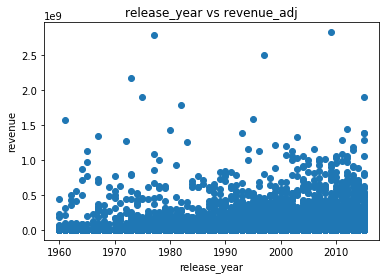

In [11]:
#plot the relationship between release_year and revenue_adj
plt.scatter(x=movies.release_year, y=movies.revenue_adj)
plt.title('release_year vs revenue_adj')
plt.xlabel("release_year")
plt.ylabel("revenue")

## Conclusions



- Movies from 2010 to after 2010 achieved high revenues

## Research Question 3 (How long is the average of movie time? )


In [12]:
# make a describe of runtime of movies
movies['runtime'].describe()


count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

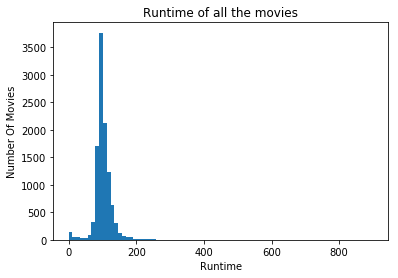

In [13]:
# histrogram for runtime and the number of movies
plt.xlabel('Runtime')
plt.ylabel('Number Of Movies')
plt.title('Runtime of all the movies')
plt.hist(movies['runtime'], bins =80);

## Conclusions

From the histogrsm the distribution is right skewed
- the average of movie time is 102 min

## Research Question 4 (Do movies with high budget have high revenues?)

Text(0,0.5,'revenue')

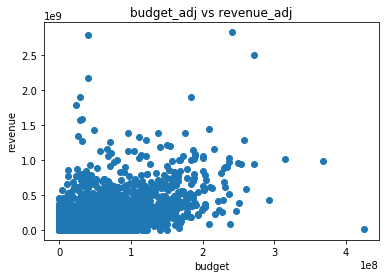

In [14]:
#plot the relationship between budget_adj and revenue_adj
plt.scatter(x=movies.budget_adj, y=movies.revenue_adj)
plt.title('budget_adj vs revenue_adj')
plt.xlabel("budget")
plt.ylabel("revenue")

## Conclusions
- There's a positive correlation between these two variables.
- The more budget, the higher revenue of the movies was.

- There are a few outliers

## limitations
we need to do normalization and remove the outlier in data
During the data cleaning process, I drooped irrelevant attributes  during. This increases the time taken in calculating the result.